# WeatherPy

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from datetime import date
%matplotlib inline

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
cities_output_file = "output_data/cities.csv"
weather_output_file= "output_data/weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [40]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [41]:
print(*cities, sep=",")

barrow,ternate,rikitea,lompoc,mataura,macon,avera,kodiak,punta arenas,ribeira grande,mar del plata,jamestown,dikson,mahebourg,souillac,severo-kurilsk,asyut,marcona,vertou,meyungs,tura,kaitangata,cape town,kohlu,qeshm,qasigiannguit,saint george,sitka,narsaq,bargal,aripuana,lavrentiya,kapaa,albany,saskylakh,husavik,fortuna,copiapo,porto santo,castro,fukue,faya,hovd,qaanaaq,bluff,arraial do cabo,busselton,illoqqortoormiut,ushuaia,jining,ilulissat,taolanaro,saleaula,raga,bayanday,saint-philippe,igarka,katsuura,pevek,vaini,port alfred,clyde river,midland,nizhneyansk,pemangkat,beringovskiy,airai,zimovniki,sao filipe,sambava,byron bay,longyearbyen,east london,barentu,san patricio,qaqortoq,new norfolk,ixtapa,georgetown,aklavik,provideniya,marrakesh,springbok,hay river,zhengjiatun,xichang,pisco,svetlyy,lagoa,tomatlan,saiha,avarua,barra patuca,kloulklubed,romny,swan hill,mount gambier,priladozhskiy,tucumcari,hermanus,hobart,moron,solovetskiy,vangaindrano,victor harbor,port elizabeth,garden city,

In [42]:
#save cities list as csv
cities_df= pd.DataFrame({'City':cities})
cities_df.to_csv(cities_output_file, index=True, index_label='City_Id')

# Perform API Calls
    Perform a weather check on each city using a series of successive API calls.
    Include a print log of each city as it'sbeing processed (with the city number and city name).

In [43]:
# build Url

base_url= 'https://api.openweathermap.org/data/2.5/weather?'

params={'appid':api_key,
       'unit':'metric',
       'q':cities[6]}


#get sample data for random city

response=requests.get(base_url, params=params).json()
response


{'coord': {'lon': -82.53, 'lat': 33.19},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 286.87,
  'feels_like': 282,
  'temp_min': 284.82,
  'temp_max': 289.15,
  'pressure': 1017,
  'humidity': 32},
 'visibility': 16093,
 'wind': {'speed': 3.6, 'deg': 310},
 'clouds': {'all': 1},
 'dt': 1577914054,
 'sys': {'type': 1,
  'id': 4414,
  'country': 'US',
  'sunrise': 1577882006,
  'sunset': 1577917995},
 'timezone': -18000,
 'id': 4231997,
 'name': 'Avera',
 'cod': 200}

In [11]:
print(f"Processing record 1 of set 1 |{response['name']} ")

Processing record 1 of set 1 |Narwar 


In [44]:
#setting up lists and other varibales
weather=[]
city_name=[]
cloudiness=[]
countries = []
date = []
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]


In [45]:
#get data for all the cities in the list
#############################################################################################
base_url= 'https://api.openweathermap.org/data/2.5/weather?'

params={'appid':api_key,
       'unit':'metric'}

print('Beginning Data Retrieval'+ '\n' + ('--')*25)

#set counters
count=1
counter=1

for city in cities:
    
    params['q'] = city
    
    try:
        
        city_weather= requests.get(base_url, params=params).json()
    
        print(f"Processing record {count} of set {counter} |{city_weather['name']} ")
        
        #Append the required lists
        city_name.append(city_weather['name'])
        weather.append(city_weather['weather'][0]['main'])
        cloudiness.append(city_weather['clouds']['all'])
        countries.append(city_weather['sys']['country'])
        date.append(city_weather['dt'])
        humidity.append(city_weather['main']['humidity'])   
        lat.append(city_weather['coord']['lat'])
        lng.append(city_weather['coord']['lon'])
        max_temp.append(city_weather['main']['temp_max'])
        wind_speed.append(city_weather['wind']['speed'])
        
        count+=1
            
    except KeyError:
        print("City not found. Skipping...")
        
   

    if count==51:
        print("Count=50")
        time.sleep(3)
        counter+=1
        count=1
        
                
print(('--')*25+"\n" +"Data Retrieval Complete"+ "\n" +('--')*25)


Beginning Data Retrieval
--------------------------------------------------
Processing record 1 of set 1 |Barrow 
Processing record 2 of set 1 |Ternate 
Processing record 3 of set 1 |Rikitea 
Processing record 4 of set 1 |Lompoc 
Processing record 5 of set 1 |Mataura 
Processing record 6 of set 1 |Macon 
Processing record 7 of set 1 |Avera 
Processing record 8 of set 1 |Kodiak 
Processing record 9 of set 1 |Punta Arenas 
Processing record 10 of set 1 |Ribeira Grande 
Processing record 11 of set 1 |Mar del Plata 
Processing record 12 of set 1 |Jamestown 
Processing record 13 of set 1 |Dikson 
Processing record 14 of set 1 |Mahebourg 
Processing record 15 of set 1 |Souillac 
Processing record 16 of set 1 |Severo-Kurilsk 
Processing record 17 of set 1 |Asyut 
City not found. Skipping...
Processing record 18 of set 1 |Vertou 
City not found. Skipping...
Processing record 19 of set 1 |Tura 
Processing record 20 of set 1 |Kaitangata 
Processing record 21 of set 1 |Cape Town 
Processing recor

Processing record 30 of set 4 |Hamilton 
Processing record 31 of set 4 |Canela 
Processing record 32 of set 4 |Duverge 
Processing record 33 of set 4 |Fairbanks 
Processing record 34 of set 4 |Tiznit 
Processing record 35 of set 4 |Tasiilaq 
Processing record 36 of set 4 |Yangjiang 
Processing record 37 of set 4 |Port Hedland 
Processing record 38 of set 4 |Upernavik 
Processing record 39 of set 4 |Bredasdorp 
Processing record 40 of set 4 |Varkkallai 
Processing record 41 of set 4 |Hilo 
Processing record 42 of set 4 |Norman Wells 
Processing record 43 of set 4 |Sycow 
Processing record 44 of set 4 |Walcz 
Processing record 45 of set 4 |Bilibino 
Processing record 46 of set 4 |Jardim 
Processing record 47 of set 4 |Roald 
City not found. Skipping...
Processing record 48 of set 4 |Saint-Leu 
Processing record 49 of set 4 |Yulara 
Processing record 50 of set 4 |Namibe 
Count=50
Processing record 1 of set 5 |Mvuma 
Processing record 2 of set 5 |Takaka 
Processing record 3 of set 5 |Grind

Processing record 17 of set 8 |Kamaishi 
Processing record 18 of set 8 |Peterhead 
Processing record 19 of set 8 |Salalah 
Processing record 20 of set 8 |Olavarria 
Processing record 21 of set 8 |Anse-Bertrand 
Processing record 22 of set 8 |Hualmay 
Processing record 23 of set 8 |Tuy Hoa 
Processing record 24 of set 8 |Karasjok 
City not found. Skipping...
Processing record 25 of set 8 |Magaramkent 
Processing record 26 of set 8 |Bundaberg 
Processing record 27 of set 8 |Poya 
Processing record 28 of set 8 |Aras 
Processing record 29 of set 8 |Miranda 
Processing record 30 of set 8 |Pudozh 
Processing record 31 of set 8 |Arlit 
Processing record 32 of set 8 |Acapulco 
Processing record 33 of set 8 |Linxia 
Processing record 34 of set 8 |Makakilo City 
Processing record 35 of set 8 |Casablanca 
Processing record 36 of set 8 |Swan River 
Processing record 37 of set 8 |Havre-Saint-Pierre 
Processing record 38 of set 8 |Parauna 
Processing record 39 of set 8 |Concordia 
Processing record 

Processing record 50 of set 11 |Sol-Iletsk 
Count=50
Processing record 1 of set 12 |Laguna 
Processing record 2 of set 12 |Pyatnitskoye 
Processing record 3 of set 12 |Bereda 
Processing record 4 of set 12 |Amapa 
Processing record 5 of set 12 |Changli 
City not found. Skipping...
Processing record 6 of set 12 |Hudson Bay 
Processing record 7 of set 12 |Namatanai 
Processing record 8 of set 12 |Baykit 
Processing record 9 of set 12 |Kruisfontein 
--------------------------------------------------
Data Retrieval Complete
--------------------------------------------------


# Convert Raw Data to DataFrame

    Export the city data into a .csv.
    Display the DataFrame

In [46]:
city_weather_df=pd.DataFrame({"City":city_name ,
                              "Cloudiness":cloudiness,
                              "Country":countries,
                              "Date":date,
                              "Humidity":humidity,
                              "Latitude":lat,
                              "Longitude":lng,
                              "Max Temp":max_temp,
                              "Wind Speed":wind_speed
                             })
city_weather_df.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Latitude      559
Longitude     559
Max Temp      559
Wind Speed    559
dtype: int64

In [47]:
city_weather_df.to_csv(weather_output_file, index=True, index_label='City_Id')
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Barrow,0,AR,1577914064,54,-38.31,-60.23,294.46,5.60
1,Ternate,75,PH,1577914064,88,14.29,120.72,298.15,7.85
2,Rikitea,100,PF,1577914065,80,-23.12,-134.97,299.08,5.21
3,Lompoc,1,US,1577914016,59,34.64,-120.46,292.04,4.60
4,Mataura,100,NZ,1577914065,97,-46.19,168.86,284.67,0.33


# Plotting the Data
    Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
    Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot


In [49]:
plt.style.use('seaborn')

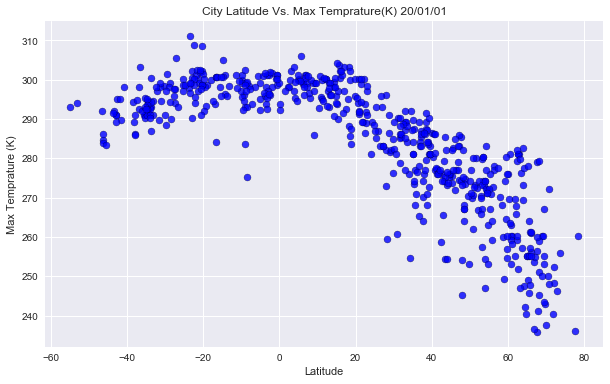

In [50]:
Date=time.strftime("%y/%m/%d")

plt.figure(figsize=(10,6))
plt.scatter(city_weather_df['Latitude'],city_weather_df['Max Temp'],marker='o',
            facecolors ="blue", edgecolors='black',alpha = 0.8)

plt.title(f"City Latitude Vs. Max Temprature(K) {Date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (K)")
plt.grid(True)
plt.savefig("Images/Temparature.png")
plt.show()

#### Latitude vs. Humidity Plot

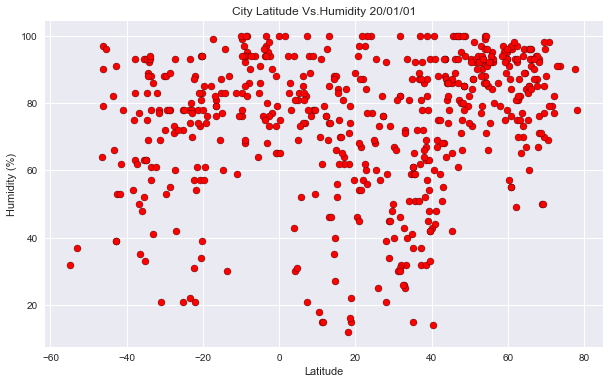

In [51]:
# Build the scatter plots 
Date=time.strftime("%y/%m/%d")

plt.figure(figsize=(10,6))
plt.scatter(city_weather_df['Latitude'],city_weather_df['Humidity'],marker='o',
            facecolors ="red", edgecolors='black',alpha = 1 )

plt.title(f"City Latitude Vs.Humidity {Date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Images/Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

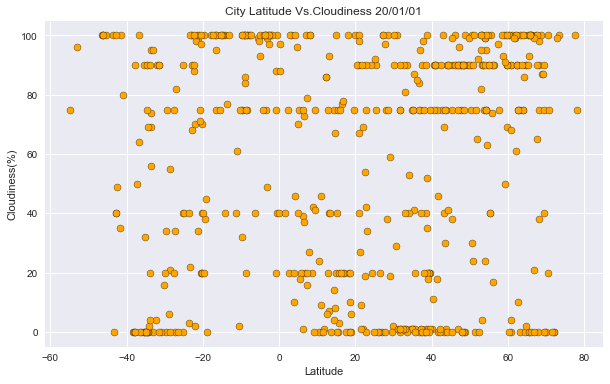

In [52]:
# Build the scatter plots 
Date=time.strftime("%y/%m/%d")

plt.figure(figsize=(10,6))
plt.scatter(city_weather_df['Latitude'],city_weather_df['Cloudiness'],marker='o',
            facecolors ="orange", edgecolors='black',alpha = 1 )

plt.title(f"City Latitude Vs.Cloudiness {Date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
plt.savefig("Images/Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

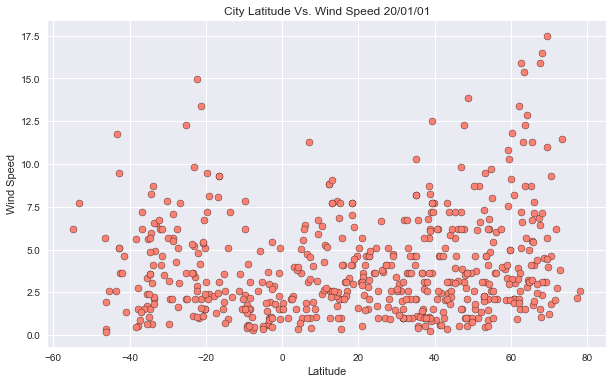

In [53]:
# Build the scatter plots 
Date=time.strftime("%y/%m/%d")

plt.figure(figsize=(10,6))
plt.scatter(city_weather_df['Latitude'],city_weather_df['Wind Speed'],marker='o',
            facecolors ="salmon", edgecolors='black',alpha = 1 )

plt.title(f"City Latitude Vs. Wind Speed {Date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.savefig("Images/Wind Speed.png")
plt.show()

In [54]:
html_table=city_weather_df.to_html().replace("\n","")
html_table

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>City</th>      <th>Cloudiness</th>      <th>Country</th>      <th>Date</th>      <th>Humidity</th>      <th>Latitude</th>      <th>Longitude</th>      <th>Max Temp</th>      <th>Wind Speed</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>Barrow</td>      <td>0</td>      <td>AR</td>      <td>1577914064</td>      <td>54</td>      <td>-38.31</td>      <td>-60.23</td>      <td>294.46</td>      <td>5.60</td>    </tr>    <tr>      <th>1</th>      <td>Ternate</td>      <td>75</td>      <td>PH</td>      <td>1577914064</td>      <td>88</td>      <td>14.29</td>      <td>120.72</td>      <td>298.15</td>      <td>7.85</td>    </tr>    <tr>      <th>2</th>      <td>Rikitea</td>      <td>100</td>      <td>PF</td>      <td>1577914065</td>      <td>80</td>      <td>-23.12</td>      <td>-134.97</td>      <td>299.08</td>      <td>5.21</td>    </tr>    <tr>      <th>3</th>      <td>L